In [1]:
# One time setting up environment
import os
import torch

# Clone the yoloV5 repo from github
!git clone https://github.com/ultralytics/yolov5

if "yolov5" not in os.getcwd():
    # Get the current working directory
    current_dir = os.getcwd()

    # Navigate to the "yolov5" folder in the current directory
    os.chdir(os.path.join(current_dir, "yolov5"))

# Install all dependencies
!pip3 install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 15002, done.
remote: Total 15002 (delta 0), reused 0 (delta 0), pack-reused 15002
Receiving objects: 100% (15002/15002), 14.02 MiB | 20.95 MiB/s, done.
Resolving deltas: 100% (10291/10291), done.
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/Users/User1/Library/Python/3.7/lib/python/site-packages/pip/_internal/cli/main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/Users/User1/Library/Python/3.7/lib/python/site-packages/pip/_internal/cli/autocompletion.py", line 12, in <module>
    from pip._internal.metadata import get_default_environment
  File "/Users/User1/Library/Python/3.7/lib/python/site-packages/pip/_internal/metadata/__init__.py", line 9, in <module>
    from .base import (BaseDistribution, BaseEnvironment, FilesystemWheel,
  File "/Users/User1/Li

In [3]:
# TODO: Paste the model inside the yolov5 folder.

# model = torch.hub.load("ultralytics/yolov5", "custom", "model_- 14 january 2023 23_01.pt")

# model.eval()
# torch.save(model, 'model_stored.pt')


Using cache found in /Users/User1/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-1-27 Python-3.10.9 torch-1.12.1 CPU

Fusing layers... 
Model summary: 267 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
Adding AutoShape... 


In [4]:
import os
import torch
# !/opt/homebrew/bin/python3.11 -m pip install -r requirements.txt
!/usr/local/bin/python3 -m pip install -r requirements.txt

# !/usr/local/bin/python3 -m pip install torch===1.3.1 torchvision===0.4.2 -f https://download.pytorch.org/whl/torch_stable.html

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/User1/Library/Python/3.7/lib/python/site-packages/pip/__main__.py", line 29, in <module>
    from pip._internal.cli.main import main as _main
  File "/Users/User1/Library/Python/3.7/lib/python/site-packages/pip/_internal/cli/main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/Users/User1/Library/Python/3.7/lib/python/site-packages/pip/_internal/cli/autocompletion.py", line 12, in <module>
    from pip._internal.metadata import get_default_environment
  File "/Users/User1/Library/Python/3.7/lib/python/site-packages/pip/_internal/metadata/__init__.py", line 9, in <module>
    from .base import (BaseDistribution, BaseEnvi

In [27]:
import numpy as np
import cv2

def detect_objects(image, model="yoloV5_model_medium.pt", window_size=(416,416), window_step=(416,416)):
    """
    Args:
    - image: a NumPy array representing the input image.
    - model: a stored model to load.
    - window_size: a tuple of two integers representing the size of the sliding window.
    - window_step: a tuple of two integers representing the step of the sliding window.

    Returns:
    - A NumPy array of bounding boxes in YOLOv5 format.
    """
    # Initialize a list to store the bounding boxes.
    bounding_boxes = np.empty((0, 6))

    # Extract the shape of the input image.
    height, width, _ = image.shape
    print('Image shape: ', image.shape)

    # Slide a window across the image and detect bounding boxes for each window.
    for y in range(0, height - window_size[1], window_step[1]):
        for x in range(0, width - window_size[0], window_step[0]):
            # Extract the window.
            window = image[y:y + window_size[1], x:x + window_size[0], :]

            # Load model
            object_detection_model = torch.load(model)
            
            # Detect the bounding boxes for the window.
            detection_results = object_detection_model(window)
            boxes = detection_results.xyxy[0].numpy()
            
            if boxes.shape[0] > 0: # If >0 bounding boxes found
                # Adjust the coordinates of the bounding boxes to the original image.
                boxes[:, [0, 2]] += x
                boxes[:, [1, 3]] += y
                
                # Append the bounding boxes to the list.
                bounding_boxes = np.vstack([bounding_boxes, boxes])
    
    # Merge the bounding boxes and remove duplicates.
    # merged_boxes = np.concatenate(bounding_boxes, axis=0)
    indices = cv2.dnn.NMSBoxes(bounding_boxes[:, :4], bounding_boxes[:, 4], 0.2, 0.9)
    merged_boxes = bounding_boxes[indices.flatten()]

    # Return the merged bounding boxes.
    return merged_boxes


In [28]:
import os
import torch
import cv2
if "yolov5" not in os.getcwd():
    # Get the current working directory
    current_dir = os.getcwd()

    # Navigate to the "yolov5" folder in the current directory
    os.chdir(os.path.join(current_dir, "yolov5"))

# Load image
image = cv2.imread("image.png")
image.shape

# Perform object detection
bounding_boxes = detect_objects(image, window_size=(400, 400), window_step=(100, 100))
bounding_boxes

# object_detection_model = torch.load('yoloV5_model_medium.pt')
# detection_results = object_detection_model(image)
# boxes = detection_results.xyxy[0].numpy()
# boxes

# results = object_detection_medium("img3.png")
# results.save()

Image shape:  (618, 480, 3)


array([[     353.55,      273.09,      399.76,       358.5,     0.81113,           0],
       [      242.6,      464.24,      306.19,      509.58,     0.76688,           0],
       [     322.53,      332.25,      390.58,       413.9,     0.70214,           0],
       [     337.67,      318.08,      398.35,      381.94,     0.69142,           0],
       [     201.22,      538.78,      251.54,      584.82,     0.68413,           0],
       [     218.96,      505.09,      264.74,      559.13,     0.68042,           0],
       [     273.06,      427.35,      323.44,      473.88,     0.66785,           0],
       [     184.05,      570.11,       234.7,         600,     0.65214,           0],
       [     294.01,      383.17,      348.06,      459.81,     0.65076,           0],
       [     239.79,      484.91,      278.74,      533.71,     0.61096,           0],
       [     264.67,      450.42,      310.94,      497.75,      0.5099,           0],
       [     372.84,      240.08,      399.

In [29]:
import cv2
import numpy as np

def draw_bounding_boxes(image, boxes, output_path=None, colors=None, thickness=1, font_scale=0.2, font_thickness=1):
    """
    Draws bounding boxes on an image using the provided list of bounding boxes.

    Args:
    - image: a NumPy array representing the input image.
    - boxes: a NumPy array of bounding boxes in the format (xmin, ymin, xmax, ymax, confidence, class).
    - output_path: a string representing the path to the output image file. If not provided, the output image is not saved.
    - colors: a list of colors to use for each class label. If not provided, random colors will be used.
    - thickness: the thickness of the bounding box lines in pixels.
    - font_scale: the font scale to use for the class labels.
    - font_thickness: the thickness of the font lines in pixels.
    
    Returns:
    - A copy of the input image with the bounding boxes drawn on it.
    """
    # Convert the image to BGR format if it is in RGB format.
    if len(image.shape) == 3 and image.shape[2] == 3:
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # If colors are not provided, use random colors for each class label.
    if colors is None:
        classes = np.unique(boxes[:, 5]).astype(int)
        np.random.seed(42)
        colors = np.random.randint(0, 255, size=(len(classes), 3), dtype=np.uint8)

    # Draw the bounding boxes and class labels on a copy of the input image.
    output_image = image.copy()
    for box in boxes:
        xmin, ymin, xmax, ymax, confidence, label = box.astype(int)

        # Draw the bounding box.
        color = tuple(map(int, colors[label % len(colors)]))
        cv2.rectangle(output_image, (xmin, ymin), (xmax, ymax), color, thickness)
        print(box)

        # Draw the class label.
        label_text = f"{label}: {confidence:.2f}"
        label_size, _ = cv2.getTextSize(label_text, cv2.FONT_HERSHEY_SIMPLEX, font_scale, font_thickness)
        cv2.rectangle(output_image, (xmin, ymin - label_size[1]), (xmin + label_size[0], ymin), color, cv2.FILLED)
        cv2.putText(output_image, label_text, (xmin, ymin), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), font_thickness)

    # If an output path is provided, save the output image to file.
    if output_path is not None:
        cv2.imwrite(output_path, output_image)

    return output_image


image_with_boxes = draw_bounding_boxes(image, bounding_boxes)
cv2.imwrite("NEWimage.png", image_with_boxes)

[     353.55      273.09      399.76       358.5     0.81113           0]
[      242.6      464.24      306.19      509.58     0.76688           0]
[     322.53      332.25      390.58       413.9     0.70214           0]
[     337.67      318.08      398.35      381.94     0.69142           0]
[     201.22      538.78      251.54      584.82     0.68413           0]
[     218.96      505.09      264.74      559.13     0.68042           0]
[     273.06      427.35      323.44      473.88     0.66785           0]
[     184.05      570.11       234.7         600     0.65214           0]
[     294.01      383.17      348.06      459.81     0.65076           0]
[     239.79      484.91      278.74      533.71     0.61096           0]
[     264.67      450.42      310.94      497.75      0.5099           0]
[     372.84      240.08      399.74      328.39     0.45857           0]
[     309.68      370.57       363.8      427.38     0.44568           0]
[     305.29      364.99      384.12  

True

In [38]:
# Unpickle and use
import pickle

with open("results.pickle", "rb") as file:
    results = pickle.load(file)


## A. Estimating Direction

In [88]:

import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.linear_model import RANSACRegressor

# Get bounding boxes
boxes = results.xyxy[0].numpy()

# Reorder the boxes, so that they are in order appearing on the line
def reorder_boxes(boxes):
    # convert boxes to center coordinates
    centers = [(int((x1 + x2) / 2), int((y1 + y2) / 2)) for x1, y1, x2, y2, conf, cl in boxes]
    centers = np.array(centers)
    x = centers[:, 0]
    y = centers[:, 1]
    
    A = np.stack([x, np.ones(len(x))], axis=1)
    w = np.linalg.lstsq(A, y, rcond=None)[0]
    line = np.array([-w[0] / w[1], 0])
    dists = np.linalg.norm(centers - line, axis=1)
    projection_vectors = (centers - line) / dists[:, np.newaxis]
    projection_points = line + dists[:, np.newaxis] * projection_vectors

    # Sort the boxes by the distances from the line
    indices = np.argsort(dists)[::-1]
    sorted_boxes = boxes[indices]
    
    # Calculate the distances between the projection points on the line
    sorted_projection_points = projection_points[indices]
    distances = np.linalg.norm(np.diff(sorted_projection_points, axis=0), axis=1)
    
    return sorted_boxes, distances

# Reorder boxes and get distance
boxes, box_distances = reorder_boxes(boxes)
print(boxes)

print(box_distances)

[[     473.51      725.01      855.34      1093.8     0.83483           0]
 [     543.33      482.07      800.03      928.42      0.6472           0]
 [     594.22       462.5      809.54       690.6     0.79754           0]
 [     610.45      331.86      802.37      499.47     0.74557           0]
 [     679.27      236.96      788.42      339.18     0.50457           0]
 [     645.11      243.92      787.85      403.37     0.48673           0]
 [     674.45      161.95      790.76      273.69     0.47115           0]]
[     204.12      132.44      161.08      129.84       38.91       107.2]


In [89]:

def find_angle(x1, y1, x2, y2):
    rise = y2 - y1
    run = x2 - x1
    angle = np.arctan(rise / run)
    angle = np.rad2deg(angle)
    return angle

def draw_line(image, boxes):
    """
    Draws a straight line that approximately goes through most center points of the bounding boxes in an image.
    Args:
        image: a numpy ndarray representing the image
        boxes: a list of bounding boxes in YOLO format [(x1, y1, x2, y2), ...]
    Returns:
        image: the image with the line drawn on it
    """
    # convert boxes to center coordinates
    centers = [(int((x1 + x2) / 2), int((y1 + y2) / 2)) for x1, y1, x2, y2, conf, cl in boxes]
    centers = np.array(centers)
    x = centers[:, 0]
    y = centers[:, 1]
    
    # Regression with RANSAC
    ransac = RANSACRegressor(min_samples=2)
    ransac.fit(x.reshape(-1, 1), y)
    inlier_mask = ransac.inlier_mask_
    outlier_mask = np.logical_not(inlier_mask)
    line_X = np.arange(x.min(), x.max())[:, np.newaxis]
    line_y_ransac = ransac.predict(line_X)
    
    # Construct line
    line_point_1 = (int(line_X[0]), int(line_y_ransac[0]))
    line_point_2 = (int(line_X[-1]), int(line_y_ransac[-1]))
    cv2.line(image, line_point_1, line_point_2, (0, 255, 0), 2)
    
    angle  = find_angle(line_point_1[0], line_point_1[1], line_point_2[0], line_point_2[1]) # Get angle from [-90, 90]
    angle = angle if angle >= 0 else angle + 180 # make from [0, 360]
    
    return image, angle, line_point_1, line_point_2

image_with_line, angle_to_horizontal, line_point_1, line_point_2 = draw_line(cv2.imread("image.png"), boxes)

print(angle_to_horizontal)

cv2.imshow('image', image_with_line)
cv2.waitKey(1000)




96.40244718629195


-1

## B. Estimating Tension

In [101]:
# Count number of boxes
number_of_boxes = boxes.shape[0]

# Set constants
ANCHORSOURCE_TO_SEALEVEL = 1 # How far is the source of the anchor from sealevel [meters]
CHAINLINK_LENGTH = 0.25 # How long is one chain link [meters]

visible_chain_length = CHAINLINK_LENGTH * number_of_boxes
print('Length of visible portion of chain [m]: ', visible_chain_length)
degrees_from_ship = np.arccos(ANCHORSOURCE_TO_SEALEVEL / visible_chain_length) * (180 / np.pi)
print('Degrees from ship: ', degrees_from_ship)

Length of visible portion of chain [m]:  1.75
Degrees from ship:  55.15009542095352


In [93]:
# Slope of chain (rate that boxes become smaller and smaller)
def calculate_area(box):
    x1, y1, x2, y2 = box[0], box[1], box[2], box[3]
    width = x2 - x1
    height = y2 - y1
    area = width * height
    return area

areas = [calculate_area(box) for box in boxes]
print(areas)

[140806.9, 114575.61, 49115.387, 32168.12, 11157.898, 22760.07, 12997.868]


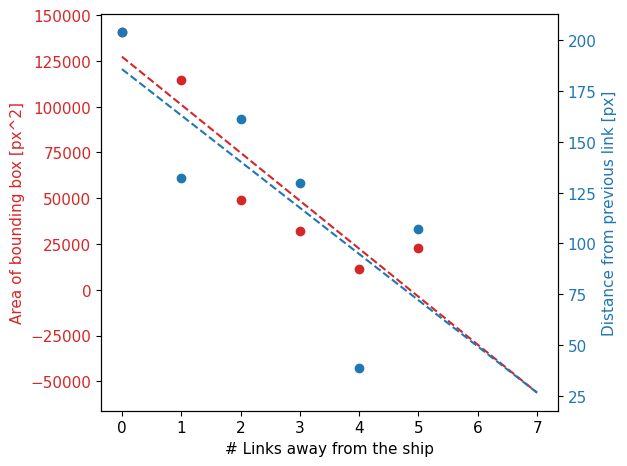

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

def plot_correlation(array1, array2, no):
    # Estimate best line fit
    x = np.array(array1)
    y = np.array(array2)
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    y_pred = m * x + c
    
    array = [i for i in range(no - 1)]
    
    # TODO: Sanity check. Shouldn't the lines be straight?
    DEGREES = 1

    # Plot
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('# Links away from the ship')
    ax1.set_ylabel('Area of bounding box [px^2]', color=color)
    ax1.scatter(array, array1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    model = make_pipeline(PolynomialFeatures(degree=DEGREES), LinearRegression())
    model.fit(np.array(array).reshape(-1, 1), array1)
    array_fit = np.linspace(0, number_of_boxes, 100)
    array1_fit = model.predict(array_fit.reshape(-1, 1))
    ax1.plot(array_fit, array1_fit, color=color, linestyle='--')


    ax2 = ax1.twinx()

    color = 'tab:blue'
    ax2.set_ylabel('Distance from previous link [px]', color=color)
    ax2.scatter(array, array2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    
    model = make_pipeline(PolynomialFeatures(degree=DEGREES), LinearRegression())
    model.fit(np.array(array).reshape(-1, 1), array2)
    array2_fit = model.predict(array_fit.reshape(-1, 1))
    ax2.plot(array_fit, array2_fit, color=color, linestyle='--')

    fig.tight_layout()
    plt.show()

plot_correlation(areas[:-1], box_distances, no=number_of_boxes)


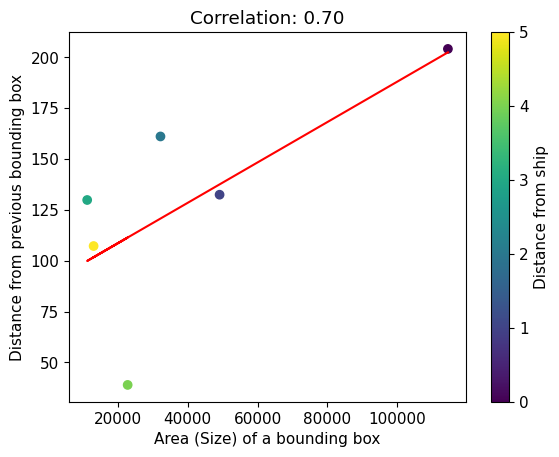

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

def plot_correlation(array1, array2, label_array1, label_array2):
    # Estimate best line fit
    x = np.array(array1)
    y = np.array(array2)
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    y_pred = m * x + c

    # Plot
    plt.scatter(array1, array2, c=range(len(array1)), cmap="viridis")
    plt.plot(array1, y_pred, color="red")
    plt.xlabel(label_array1)
    plt.ylabel(label_array2)
    plt.title(f"Correlation: {np.corrcoef(array1, array2)[0,1]:.2f}")
    plt.colorbar().set_label("Distance from ship")
    plt.show()

plot_correlation(areas[1:], box_distances, label_array1="Area (Size) of a bounding box", label_array2="Distance from previous bounding box")